**Name:** Omogbolahan Alli

**Contact Details:** oalli@student.hult.edu

**Download Project:** https://github.com/gbolarhan/census_analysis


**Description**
I am a business analyst exploring the census income dataset. This dataset predicts whether income exceeds $50K/yr based on census data. It is also known as "Census Income" dataset. You can find out more about this dataset at [this link](https://archive.ics.uci.edu/dataset/2/adult).


At the end of the analysis, we would have:

- Created plots of all relevant attributes.
- Do a summary statistics of all of or attributes.
- Clean the data by removing null or missing value. 
- Provide insight into the data and see what patterns are observed. 


Becker,Barry and Kohavi,Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.

# 1. Install Packages

We would install a few packages that are required for the purpose of our analysis.

In [31]:
!pip3 install ucimlrepo matplotlib seaborn pandas

     |████████████████████████████████| 11.0 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 30.3 MB 563 kB/s eta 0:00:01
You should consider upgrading via the '/Users/gbolahanalli/.pyenv/versions/3.9.7/bin/python3.9 -m pip install --upgrade pip' command.


# 2. Import the dataset into your code 

The ucimlrepo is used to fetch and read the dataset. More about the script can be found at (here)[https://github.com/uci-ml-repo/]ucimlrepo

In [65]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
from IPython.display import display
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Check which datasets can be imported

In [66]:
list_available_datasets()

-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       


### Get our Dataset
We want the Adult Dataset for the purpose of this analysis. You can use _Id_ or _name_ of the dataset to fetch. Either  ``` fetch_ucirepo(name='Adult') ``` OR ``` fetch_ucirepo(id=2) ```. We will use the name version for easier reading. 


This implementation assumes that you are using the fetch_ucirepo script to get your data. If you would rather just read a CSV file directly, skip to section _**3.1.5**_

In [67]:
# fetch dataset 
adult_dataset = fetch_ucirepo(name='Adult')

if(adult_dataset):
    print("Dataset fetched successfully")

Dataset fetched successfully


# 3. Exploratory Data Analysis

Let's see what we can infer from the structure of the dataset. Using the scripts allow us to take a look at the metedata and the variables it contents. 

## 3.1 Descriptive Analysis

Take a look into the data.

### 3.1.1 Inspect Metadata 

In [51]:
# Metadata: This is exposed by the dataset object and contains information about the dataset.
metadata = adult_dataset.metadata
display(metadata) 

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Mon Aug 07 2023',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the follow

### 3.1.2 Inspect Variables

In [7]:
# variable information 
variables = adult_dataset.variables
display(variables) 

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


### 3.1.3 Inspect Data

In [52]:
dataset = adult_dataset.data
display(dataset)

headers = dataset.headers
features = dataset.features
targets = dataset.targets

{'ids': None,
 'features':        age         workclass  fnlwgt  education  education-num  \
 0       39         State-gov   77516  Bachelors             13   
 1       50  Self-emp-not-inc   83311  Bachelors             13   
 2       38           Private  215646    HS-grad              9   
 3       53           Private  234721       11th              7   
 4       28           Private  338409  Bachelors             13   
 ...    ...               ...     ...        ...            ...   
 48837   39           Private  215419  Bachelors             13   
 48838   64               NaN  321403    HS-grad              9   
 48839   38           Private  374983  Bachelors             13   
 48840   44           Private   83891  Bachelors             13   
 48841   35      Self-emp-inc  182148  Bachelors             13   
 
            marital-status         occupation    relationship  \
 0           Never-married       Adm-clerical   Not-in-family   
 1      Married-civ-spouse    Exec-man

In [53]:

new_dataset = pd.concat([features, targets],  axis=1)
display(new_dataset)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


### 3.1.4 Convert to Dataframe

We want to deep dive into the Data itself for our analysis.

In [156]:
data = pd.DataFrame(new_dataset, columns=headers)
data.to_csv('01_raw_dataset.csv', index=False)


### 3.1.5 Load the dataset using the CSV file 

If you would rather read directly from the CSV file, uncomment the python code below: 


In [ ]:
# load the dataset
# data = pd.read_csv('raw_dataset.csv')
# display(data)

### 3.1.6 Check for missing Values

In [68]:
data.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

### 3.1.7 Get Summary Statistics

In [69]:
display(data.describe(include='all'))

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,47879,4.884200e+04,48842,48842.000000,48842,47876,48842,48842,48842,48842.000000,48842.000000,48842.000000,48568,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,4
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,24720
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### 3.1.8 View Data Types

In [70]:
display(data.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

## 3.2. Data Cleaning

### Replace missing values if any (example: '?' with NaN)

In [71]:
# Replace missing values if any (example: '?' with NaN)
clean_data = data.copy()
clean_data.replace('?', pd.NA, inplace=True)
display(clean_data)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


### Income Categories seem to have  a dot after

In [72]:
clean_data['income'] = clean_data['income'].str.replace('.', '', regex=False)
clean_data['outcome'] = clean_data['income'].map({'<=50K': 0, '>50K': 1})

### Drop rows with missing values

In [73]:
# Drop rows with missing values
clean_data.dropna(inplace=True)
display(clean_data)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,outcome
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K,0
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,0


### Save Cleaned up dataset

In [155]:
# Save Cleaned up dataset
clean_data.to_csv('02_clean_dataset.csv', index=False)


# 4. Data Visualization

## 4.1 High Level Visualization of Cleaned Data

### Plot all relevant attributes with subplots

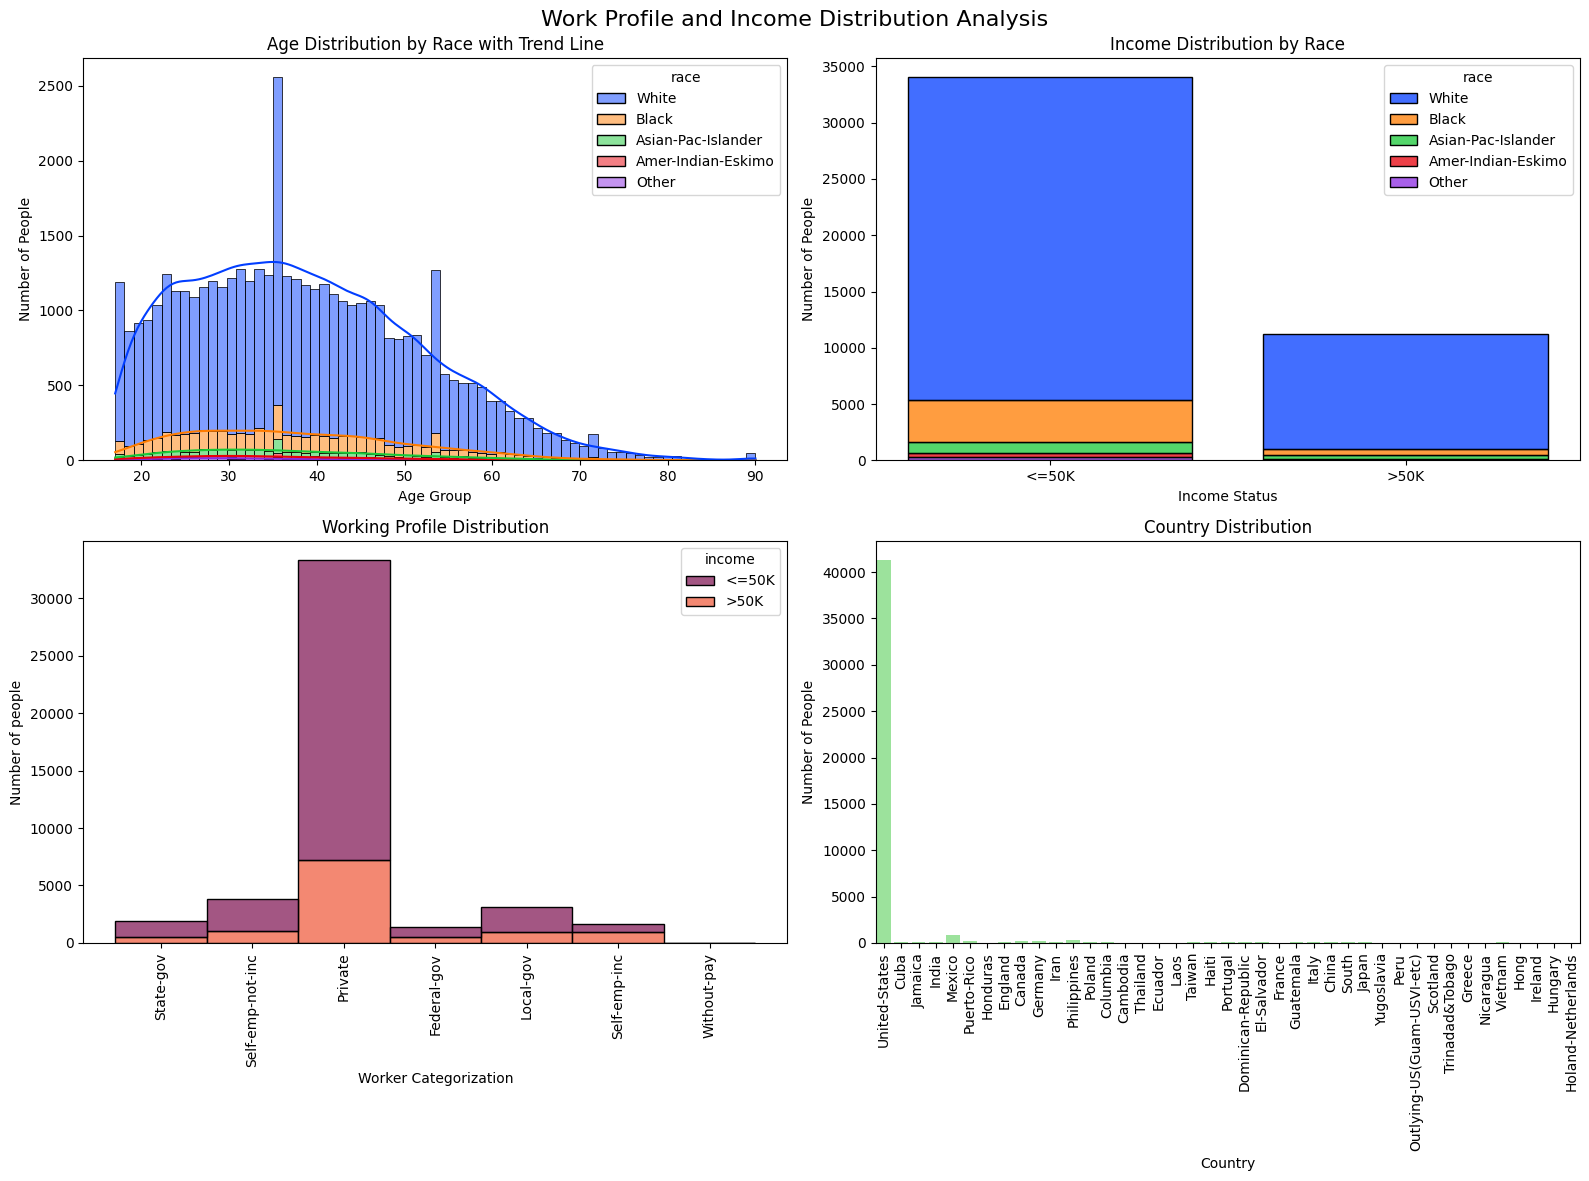

In [154]:
# 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  

# Plot 1: Age Distribution by Race 
sns.histplot(data=clean_data, x='age', hue='race', kde=True, multiple='stack', ax=axes[0, 0], palette='bright')
axes[0, 0].set_title('Age Distribution by Race with Trend Line')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Number of People')

# Plot 2: Income Distribution
sns.histplot(data=clean_data, x='income', hue='race', multiple='stack', ax=axes[0, 1], palette='bright', shrink=0.8)
axes[0, 1].set_title('Income Distribution by Race')
axes[0, 1].set_xlabel('Income Status')
axes[0, 1].set_ylabel('Number of People')

# Plot 3: Working Profile Distribution
sns.histplot(data=clean_data, x='workclass', hue='income', ax=axes[1, 0], palette='rocket', multiple='stack')
axes[1, 0].set_title('Working Profile Distribution')
axes[1, 0].set_xlabel('Worker Categorization')
axes[1, 0].set_ylabel('Number of people')
axes[1, 0].tick_params(axis='x', rotation=90)

# Plot 4: Country Distribution
sns.countplot(x='native-country', data=clean_data, ax=axes[1, 1], color='lightgreen')
axes[1, 1].set_title('Country Distribution')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Number of People')
axes[1, 1].tick_params(axis='x', rotation=90)

# Set a main title for the figure
fig.suptitle('Work Profile and Income Distribution Analysis', fontsize=16)

# Adjust layout to prevent overlap between subplots
plt.tight_layout()
# Save the figure to a file
plt.savefig('03_Plots.png')  
plt.show()

## 4.2 Narrowing down to the United States

United States has the highest number of occurences across all the countries visualized. For this reason, we do a deeper analysis into the United States. We want to:

- Age and Income: Understand how income varies across different age groups. For example which age groups have higher earnings and at what stage in their careers.
- Education Level and Income: Investigating the relationship between the highest level of education achieved and income.
- Hours Worked and Income: Examining how part-time versus full-time status or overtime hours influence income levels.

In [188]:
united_states = clean_data[clean_data['native-country'] == 'United-States']
display(united_states)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,outcome
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K,0
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,0


### Plot all relevant Attributes

/var/folders/ld/2yc3yqbs0bs2kc4ng7b0hlpc0000gn/T/ipykernel_98198/1076419175.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_income_focus.values, y=education_income_focus.index, palette='coolwarm', ax=axes[1, 1])


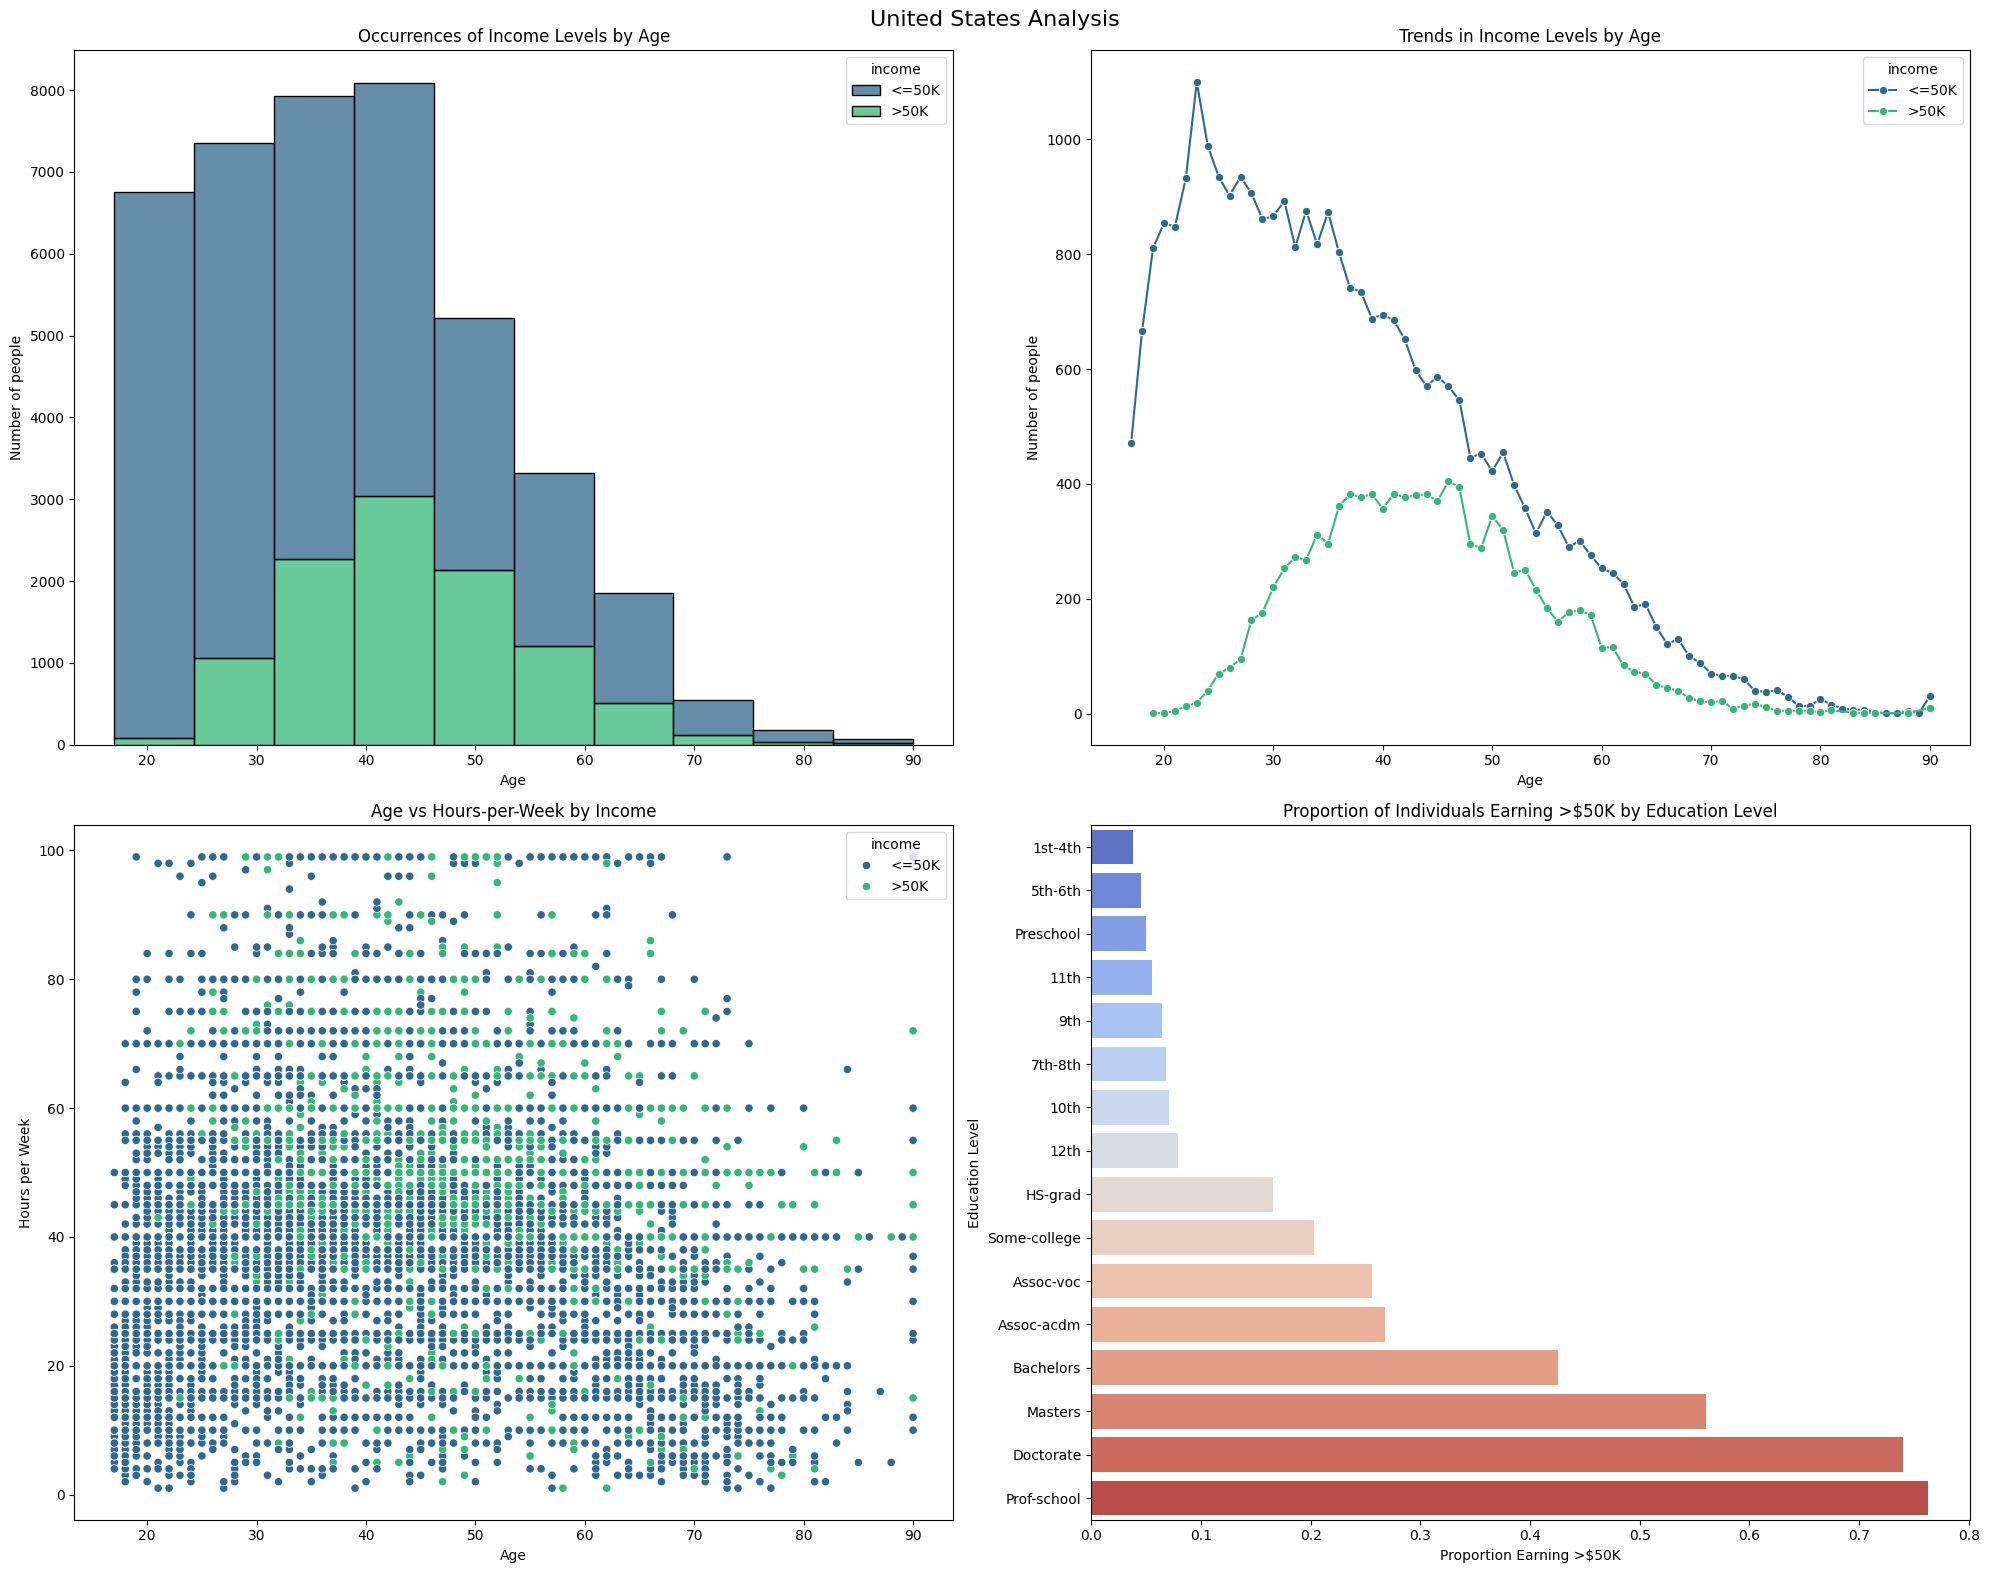

In [187]:
# Set up the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

age_income_focus = united_states.groupby(['age', 'income']).size().reset_index(name='occurence')
# First plot: Histogram of Age by Income
sns.histplot(data=age_income_focus, x='age', bins=10, weights='occurence', hue='income', multiple='stack', ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Occurrences of Income Levels by Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Number of people')

# Second plot: Line plot of Age by Occurrences
sns.lineplot(x='age', y='occurence', hue='income', data=age_income_focus, marker='o', ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Trends in Income Levels by Age')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Number of people')

# Third plot: Scatter plot of Age vs. Hours per Week
sns.scatterplot(x='age', y='hours-per-week', hue='income', data=united_states, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Age vs Hours-per-Week by Income')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Hours per Week')

# Fourth plot: Plot of income for each education level
education_income_focus = united_states.groupby('education')['outcome'].mean().sort_values()
sns.barplot(x=education_income_focus.values, y=education_income_focus.index, palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Proportion of Individuals Earning >$50K by Education Level')
axes[1, 1].set_xlabel('Proportion Earning >$50K')
axes[1, 1].set_ylabel('Education Level')

fig.suptitle('United States Analysis', fontsize=16)

# Adjust the layout
plt.tight_layout()
plt.savefig('04_Plots.png')
plt.show()

# 5. Business Insights
The visualizations provide a detailed look at the distribution of income levels, age, and working hours among individuals in the United States. Here are the key business insights:

## 5.1 Income Levels by Age (Bar Plot and Stacked Bar Plot)
  * **Observation**: The majority of individuals earn `<=50K`, with a smaller segment earning `>50K`. The income distribution varies significantly across different age groups.
  * **Insight**:
    * There is a larger market for affordable products and services catering to individuals earning `<=50K`. Businesses should consider pricing strategies that appeal to this demographic.
    * High-income earners `(>50K)` are more prevalent in the __30-50__ age range. Premium products and services can be targeted at this age group.
    * Marketing campaigns can be age-specific, targeting younger individuals with entry-level offerings and older individuals with luxury or premium products.

## 5.2 Income Trends by Age (Line Plot)
  * **Observation**: The number of individuals earning `>50K` increases steadily from the early 20s, peaks around the mid-40s, and then declines. In contrast, the number of individuals earning <=50K peaks around the early 20s to mid-30s and then gradually decreases.
  * **Insight**:
    * Financial planning and investment services can be targeted at individuals in their 30s and 40s, as this is the age range where higher incomes are more prevalent.
    * Employment and career advancement programs can be designed to help younger individuals __(20s to 30s)__ transition into higher income brackets.

## 5.3 Age vs. Hours-per-Week by Iancome (Scatter Plot)
  * **Observation**: Individuals working fewer hours per week (below 40) generally earn `<=50K`, while those working more hours (especially above 50 hours per week) have a higher likelihood of earning `>50K`.
  * **Insight**:
    * Work-life balance and productivity tools can be marketed to high earners who work longer hours. Emphasizing efficiency and stress management could appeal to this group.
    * Flexible work arrangements and part-time opportunities could be targeted at lower-income earners, highlighting the balance between income and personal time.
    
## 5.4 Distribution of Age (Histogram)
  * **Observation**: The age distribution shows a peak around __30__ and __40__, with a gradual decline towards older ages.
  * **Insight**:
    * Products and services catering to young adults and middle-aged individuals __(30-50)__ can see significant market engagement. This includes homeownership, family planning, and career development services.
    * Health and wellness products tailored for aging individuals (50+) can tap into the needs of an older demographic, focusing on healthcare, retirement planning, and active lifestyle products.